# Econometria Aplicada

## Aula 7 - Modelos ARIMA

João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Qual será o crescimento trimestral do PIB nos próximos quatro trimestres?

### Pacotes

In [ ]:
install.packages("ipeadatar")  # para obter os dados do SGS do Banco Central do Brasil
install.packages("ggplot2")    # gráficos em geral
install.packages("urca")       # para os testes de raiz unitária
install.packages("fpp3")       # para gerar as previsões

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘datawizard’, ‘sjlabelled’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘warp’, ‘BH’, ‘Rcpp’, ‘distributional’, ‘progressr’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’




In [ ]:
library(ipeadatar)
library(ggplot2)
library(urca)
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibbledata 0.4.1
✔ dplyr       1.1.2     ✔ feasts      0.3.1
✔ tidyr       1.3.0     ✔ fable       0.3.3
✔ lubridate   1.9.2     ✔ fabletools  0.3.3
✔ tsibble     1.1.3     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



## Visualização dos dados

### PIB

Procure as séries que contêm a expressão "PIB" no campo "name":

In [ ]:
search <- search_series( terms = c('PIB'), fields = c('name'), language = "br" )
search_tri <- subset( search, freq == "Trimestral" & source == "IBGE/SCN Trim.") # Filtrar séries com frequência trimestral e cuja fonte seja o Sistema de Contas Nacionais do IBGE (SCN)

In [ ]:
search_tri

code,name,theme,source,freq,lastupdate,status
<chr>,<chr>,<fct>,<fct>,<fct>,<date>,<fct>
PAN4_PIBPMG4,PIB real,Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
PAN4_PIBPMV4,PIB nominal,Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFGGBM104,PIB - consumo final - APU - índice real base móvel (média do ano anterior = 100),Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFGGG104,PIB - consumo final - APU - variação real trimestral sobre mesmo trimestre do ano anterior,Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFGGI104,PIB - consumo final - APU - índice real encadeado (média 1995 = 100),Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFGGN104,PIB - consumo final - APU,Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFPPBM104,PIB - consumo final - famílias - índice real base móvel (média do ano anterior = 100),Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFPPG104,PIB - consumo final - famílias - variação real trimestral sobre mesmo trimestre do ano anterior,Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa
SCN104_CFPPI104,PIB - consumo final - famílias - índice real encadeado (média 1995 = 100),Macroeconômico,IBGE/SCN Trim.,Trimestral,2023-06-01,Ativa


Faça o download da série da variação do PIB frente ao trimestre do ano anterior:

In [ ]:
pib = ipeadata("PAN4_PIBPMG4") # variação do PIB frente ao trimestre do ano anterior.

Veja os primeiros 5 elementos do objeto 'pib':

In [ ]:
head( pib, 5 )

code,date,value,uname,tcode
<chr>,<date>,<dbl>,<ord>,<int>
PAN4_PIBPMG4,1997-01-01,3.400572,,NA
PAN4_PIBPMG4,1997-04-01,4.754002,,NA
PAN4_PIBPMG4,1997-07-01,1.791279,,NA
PAN4_PIBPMG4,1997-10-01,3.738518,,NA
PAN4_PIBPMG4,1998-01-01,1.007575,,NA


In [ ]:
pib = ts( pib$value, start = c( 1997, 1 ), frequency = 4 )

Cire um data frame chamado 'dat' que tenha duas variáveis: o 'pib' e uma variável com o trimestre. Para isso, utilize a função 'time( objeto )', onde 'objeto é a série temporal cujo tempo você quer extrair. No nosso caso, será a varíavel 'pib':

In [ ]:
dat <- data.frame( pib, trim = time( pib ) )

Veja os primeiros 5 elementos do objeto 'dat':

In [ ]:
head( data, 5 )

,pib,trim
,<dbl>,<dbl>
1,3.400572,1997.00
2,4.754002,1997.25
3,1.791279,1997.50
4,3.738518,1997.75
5,1.007575,1998.00


Faça um gráfico com a evolução do crescimento do PIB real ao longo do tempo:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


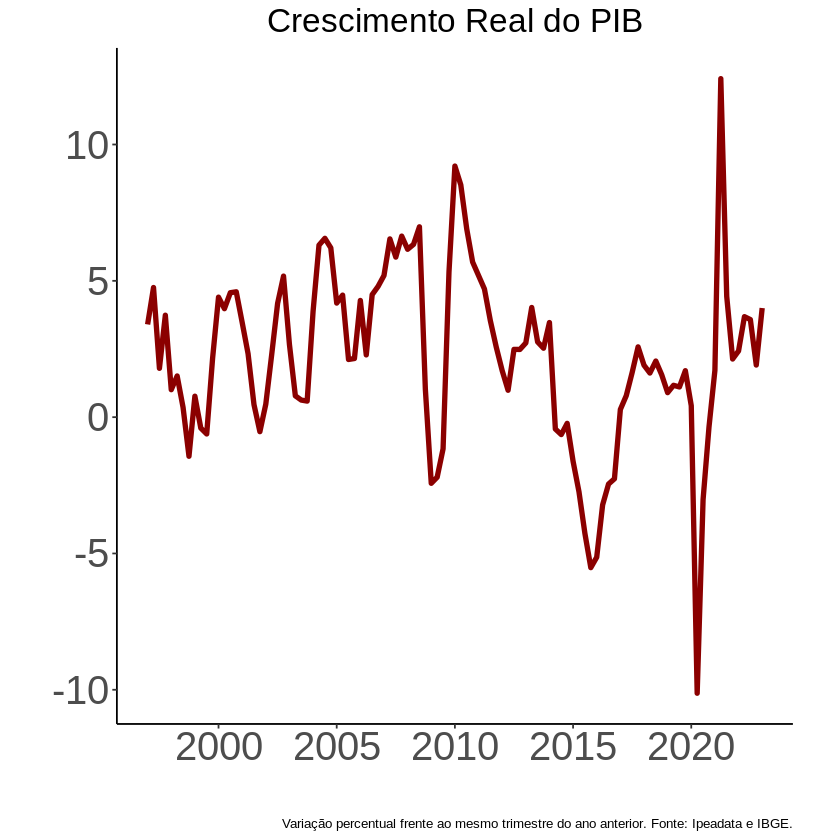

In [ ]:
ggplot(data) + geom_line(aes(x = trim, y =  pib ), size = 1.5, colour = "darkred") +
  theme_classic() +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "Crescimento Real do PIB" ) +
  theme(plot.title = element_text( size = 20, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 10) ) +
  labs( caption = "Variação percentual frente ao mesmo trimestre do ano anterior. Fonte: Ipeadata e IBGE.")

## Funções de autocorrelação

In [ ]:
install.packages("stats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
library(stats)

Faça um gráfico com a função de autocorrelação do crescimento real trimestral do PIB:

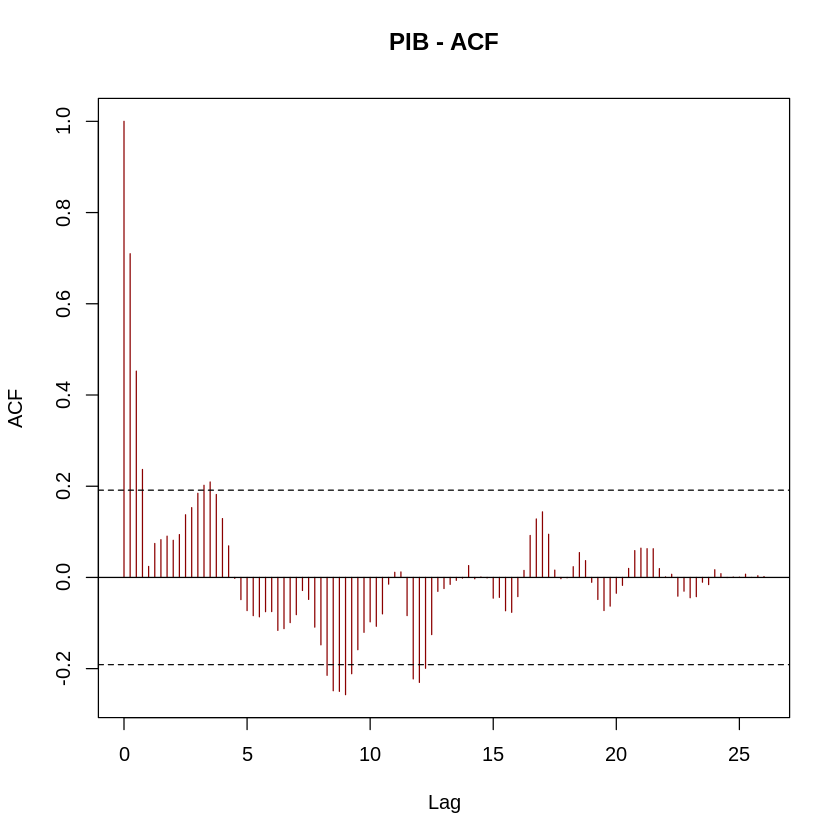

In [ ]:
acf( pib, main = "PIB - ACF", col = "darkred", ci.col = "black", lag.max = length( pib ) - 1)

Faça um gráfico com a função de autocorrelação parcial do crescimento real trimestral do PIB:

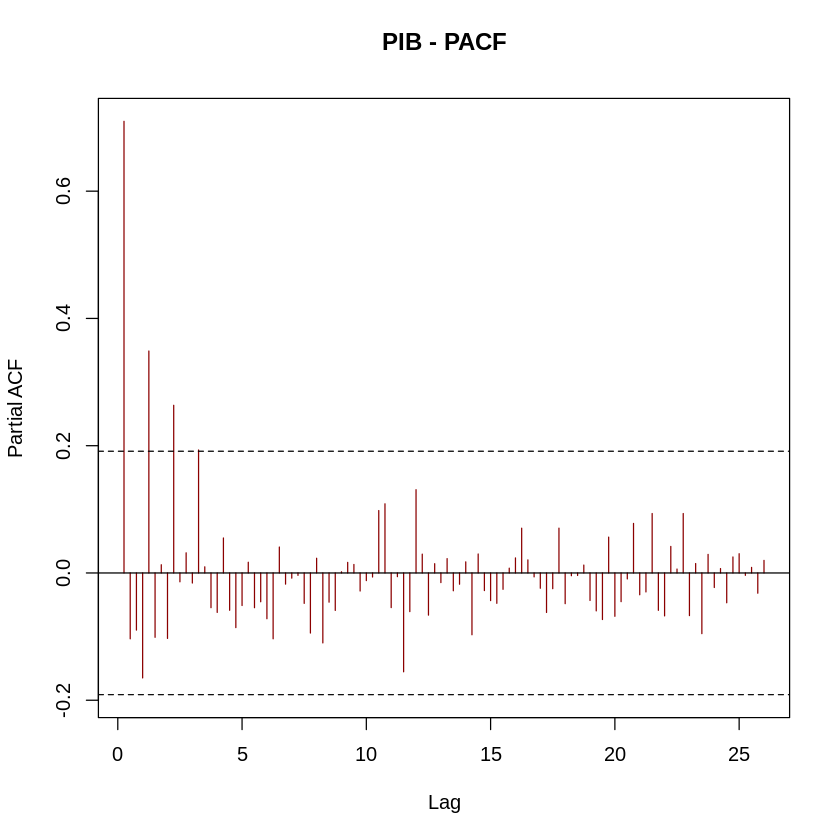

In [ ]:
pacf( pib, main = "PIB - PACF", col = "darkred", ci.col = "black", lag.max = length( pib ) - 1)

## Testes de raiz unitária

### ADF (Augmented-Dickey-Fuller)

$H_0$: possui raiz unitária

In [ ]:
summary( ur.df( pib, lags=3, type='none') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3538  -0.4409   0.5152   1.5915  10.2035 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1     -0.23422    0.07038  -3.328  0.00124 **
z.diff.lag1  0.08575    0.10381   0.826  0.41081   
z.diff.lag2  0.03644    0.10176   0.358  0.72107   
z.diff.lag3  0.08787    0.10063   0.873  0.38471   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.398 on 97 degrees of freedom
Multiple R-squared:  0.1097,	Adjusted R-squared:  0.07299 
F-statistic: 2.988 on 4 and 97 DF,  p-value: 0.02255


Value of test-statistic is: -3.328 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


### KPSS

$H_0$: não possui raiz unitária

In [ ]:
summary( ur.kpss( pib, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.3292 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


## Estimando modelos AR, MA e ARIMA

Estime um modelo AR(1):

In [ ]:
ar1 = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(1,0,0) + PDQ(0,0,0) ) )
report( ar1 )

Series: pib 
Model: ARIMA(1,0,0) w/ mean 

Coefficients:
         ar1  constant
      0.7060    0.6758
s.e.  0.0678    0.2184

sigma^2 estimated as 5.334:  log likelihood=-236.21
AIC=478.42   AICc=478.66   BIC=486.38


Estime um modelo AR(2):

In [ ]:
ar2 = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(2,0,0) + PDQ(0,0,0) ) )
report( ar2 )

Series: pib 
Model: ARIMA(2,0,0) w/ mean 

Coefficients:
         ar1      ar2  constant
      0.7807  -0.1043    0.7390
s.e.  0.0968   0.0968    0.2184

sigma^2 estimated as 5.326:  log likelihood=-235.63
AIC=479.27   AICc=479.67   BIC=489.88


Estime um modelo MA(1):

In [ ]:
ma1 = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(0,0,1) + PDQ(0,0,0) ) )
report( ma1 )

Series: pib 
Model: ARIMA(0,0,1) w/ mean 

Coefficients:
         ma1  constant
      0.8878    2.2221
s.e.  0.0488    0.4325

sigma^2 estimated as 5.668:  log likelihood=-239.83
AIC=485.66   AICc=485.9   BIC=493.63


Estime um modelo MA(2):

In [ ]:
#MA(2)
ma2 = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(0,0,2) + PDQ(0,0,0) ) )
report( ma2 )

Series: pib 
Model: ARIMA(0,0,2) w/ mean 

Coefficients:
         ma1     ma2  constant
      0.9180  0.0369    2.2216
s.e.  0.0795  0.0710    0.4472

sigma^2 estimated as 5.71:  log likelihood=-239.7
AIC=487.39   AICc=487.79   BIC=498.01


Estime um modelo ARIMA(1,0,1):

In [ ]:
arima = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(1,0,1) + PDQ(0,0,0) ) )
report( arima )

Series: pib 
Model: ARIMA(1,0,1) w/ mean 

Coefficients:
         ar1     ma1  constant
      0.6435  0.1283    0.8153
s.e.  0.1031  0.1355    0.2463

sigma^2 estimated as 5.335:  log likelihood=-235.73
AIC=479.45   AICc=479.85   BIC=490.07


Estime um modelo ARIMA(2,0,2):

In [ ]:
arima = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(2,0,2) + PDQ(0,0,0) ) )
report( arima )

Series: pib 
Model: ARIMA(2,0,2) w/ mean 

Coefficients:
         ar1     ar2     ma1      ma2  constant
      0.0349  0.4323  0.8758  -0.0595    1.2080
s.e.  0.1676  0.1003  0.1648   0.1441    0.3747

sigma^2 estimated as 4.875:  log likelihood=-230.39
AIC=472.77   AICc=473.63   BIC=488.69


#### Projeções

Estime um modelo AR(1) e faça a projeção para os próximos quatro trimestres:

In [ ]:
ar = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(1,0,0) + PDQ(0,0,0) ) ) %>% forecast(h = 4)

Crie um data frame que contenha (i) os dados observados do PIB junto aos dados projetados e (ii) uma série de datas:

In [ ]:
data = data.frame( pib = ts( c( pib,  ar$.mean ) ),
                   dates = seq(as.Date('1997-03-01'), as.Date('2024-03-01'), by='quarter') )

Crie um objeto para que no gráfico a área hachurada represente o período de projeções:

In [ ]:
forecast = read.table(textConnection(
  "Beg, End
2023-6-01, 2024-03-01"), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Faça um gráfico com as projeções do modelo AR(1) para o PIB:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


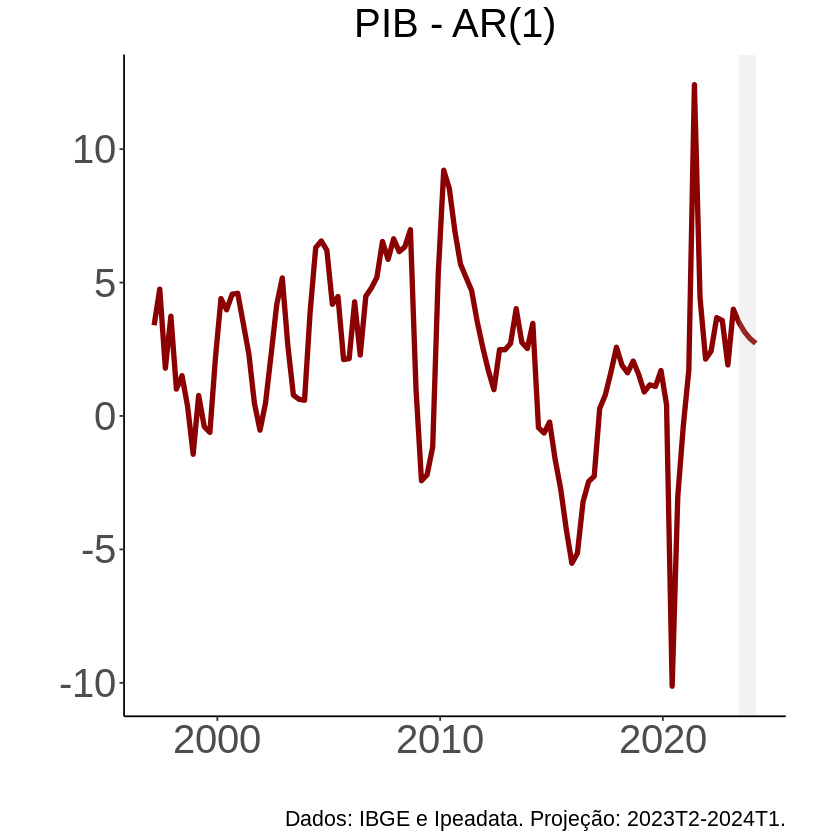

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  pib ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "PIB - AR(1)" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) ) +
  labs( caption = "Dados: IBGE e Ipeadata. Projeção: 2023T2-2024T1.")

Estime um modelo MA(2) e faça a projeção para os próximos quatro trimestres:

In [ ]:
ma = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(0,0,2) + PDQ(0,0,0) ) )  %>% forecast(h = 4)

Crie um data frame que contenha (i) os dados observados do PIB junto aos dados projetados e (ii) uma série de datas:

In [ ]:
data = data.frame( pib = ts( c( pib,  ma$.mean ) ),
                   dates = seq(as.Date('1997-03-01'), as.Date('2024-03-01'), by='quarter') )

Faça um gráfico com as projeções do modelo MA(2) para o PIB:

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


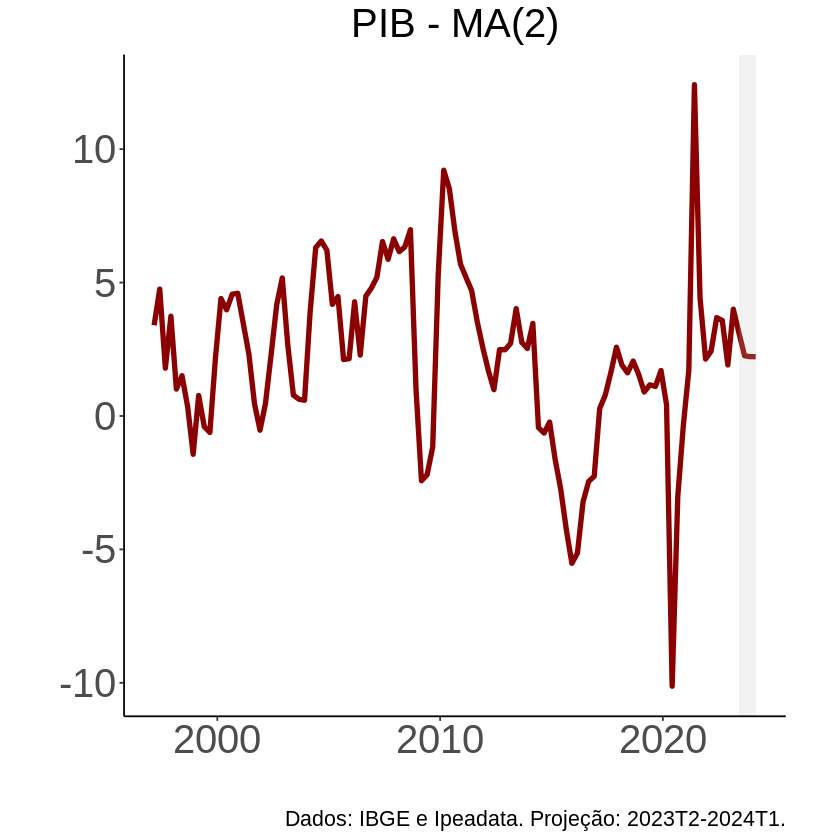

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  pib ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "PIB - MA(2)" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) ) +
  labs( caption = "Dados: IBGE e Ipeadata. Projeção: 2023T2-2024T1.")

## Projeções com o modelo ARIMA

Estime um modelo ARIMA cuja ordem será escolhida automaticamente:

In [ ]:
arima = pib %>% as_tsibble() %>% model( ARIMA( pib ) )

report( arima )

Series: pib 
Model: ARIMA(1,0,0)(0,0,1)[4] w/ mean 

Coefficients:
         ar1     sma1  constant
      0.9273  -0.7353    0.1657
s.e.  0.0391   0.0754    0.0491

sigma^2 estimated as 3.836:  log likelihood=-219.81
AIC=447.61   AICc=448.01   BIC=458.23


Faça a projeção para os próximos quatro trimestres:

In [ ]:
arima = arima %>% forecast(h = 4)

Crie um data frame que contenha (i) os dados observados do PIB junto aos dados projetados e (ii) uma série de datas:

In [ ]:
data = data.frame( pib = ts( c( pib,  arima$.mean ) ),
                   dates = seq(as.Date('1997-03-01'), as.Date('2024-03-01'), by='quarter') )

Faça um gráfico com as projeções do modelo ARIMA para o PIB:

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


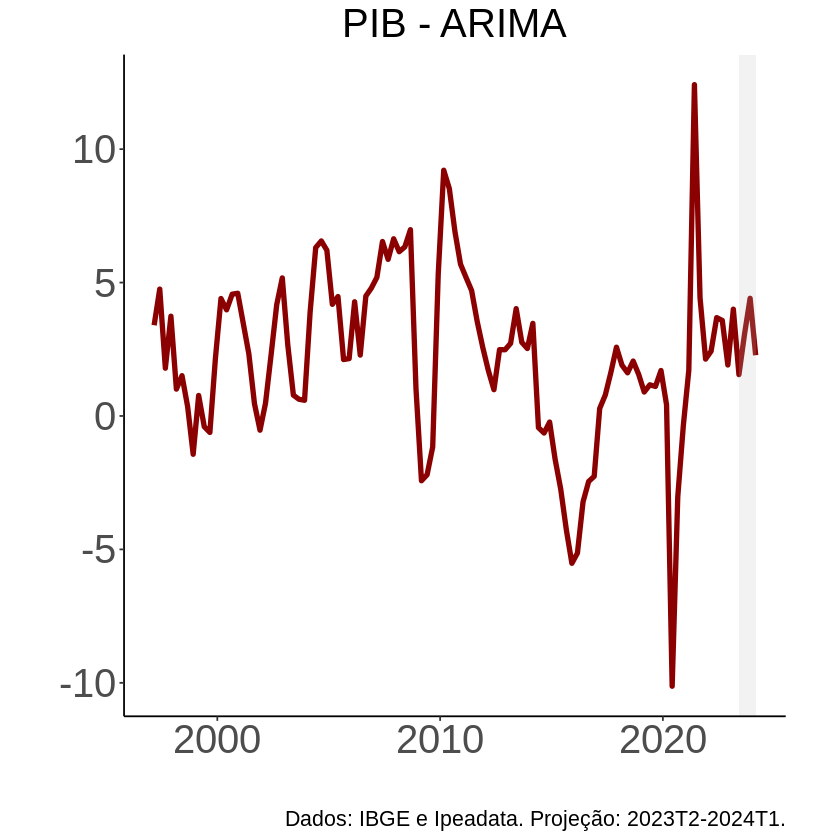

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  pib ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "PIB - ARIMA" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) ) +
  labs( caption = "Dados: IBGE e Ipeadata. Projeção: 2023T2-2024T1.")

### Resíduos ARIMA

Analise os resíduos do modelo ARIMA:

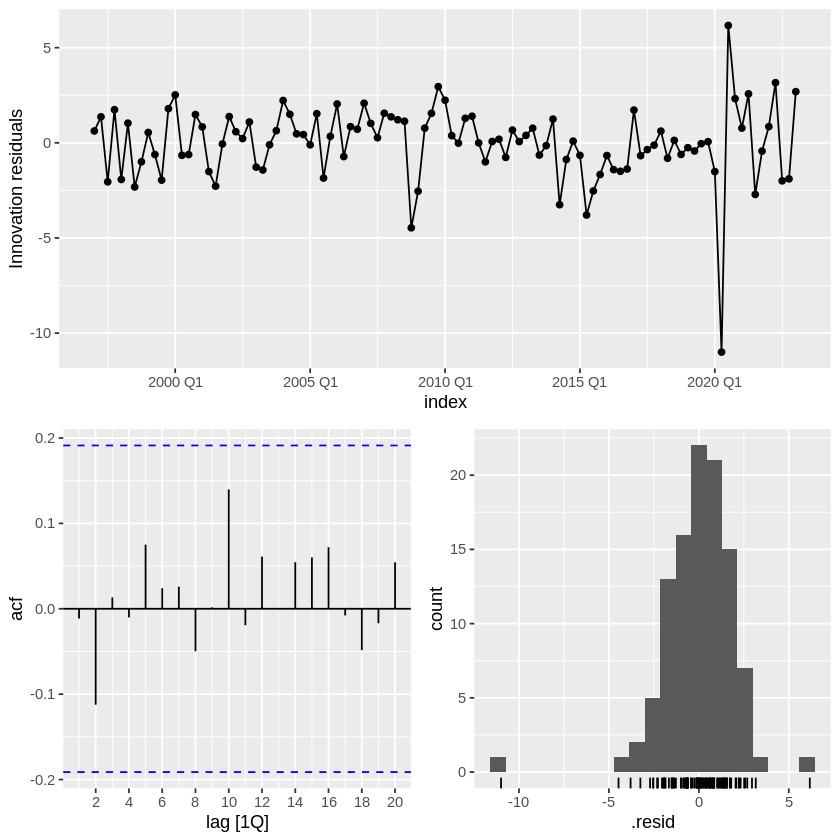

In [ ]:
pib %>% as_tsibble() %>%  model( ARIMA( pib ) )  %>%
  gg_tsresiduals()